In [47]:
# Generate data
n = 500
p = 2
y = c(rep(0,n/2),rep(1,n/2))
x_class1 = matrix(rnorm(n/2*p),n/2,p)-1
x_class2 = matrix(rnorm(n/2*p),n/2,p)+1
x = rbind(x_class1,x_class2)
data = as.data.frame(cbind(y,x))
names(data) = c("y",paste("x",1:p,sep=""))

In [54]:
mylogistic <- function(y,x){
  maxIter = 500
  n = dim(x)[1]
  p = dim(x)[2]
  
  x = cbind(matrix(1,n,1),x)
  XtX = t(x)%*%x
  
  w_old = matrix(0,p+1,1)
  prob = 1/(1+exp(-x%*%w_old))

   for (iter in 1:maxIter){
     z =  0.25*x%*%w_old + (y-prob);
     w = solve(0.25*XtX)%*%(t(x)%*%z);
  
     if (max(abs(w_old-w))/sqrt(sum(w^2)) < 1e-4){
       break
     }
     prob = 1/(1+exp(-x%*%w))
     prob[prob>0.999] = 0.999
     prob[prob<0.001] = 0.001
  
     w_old = w
  }
  return(list(prob=prob,w=w,Iter = iter)) 
}

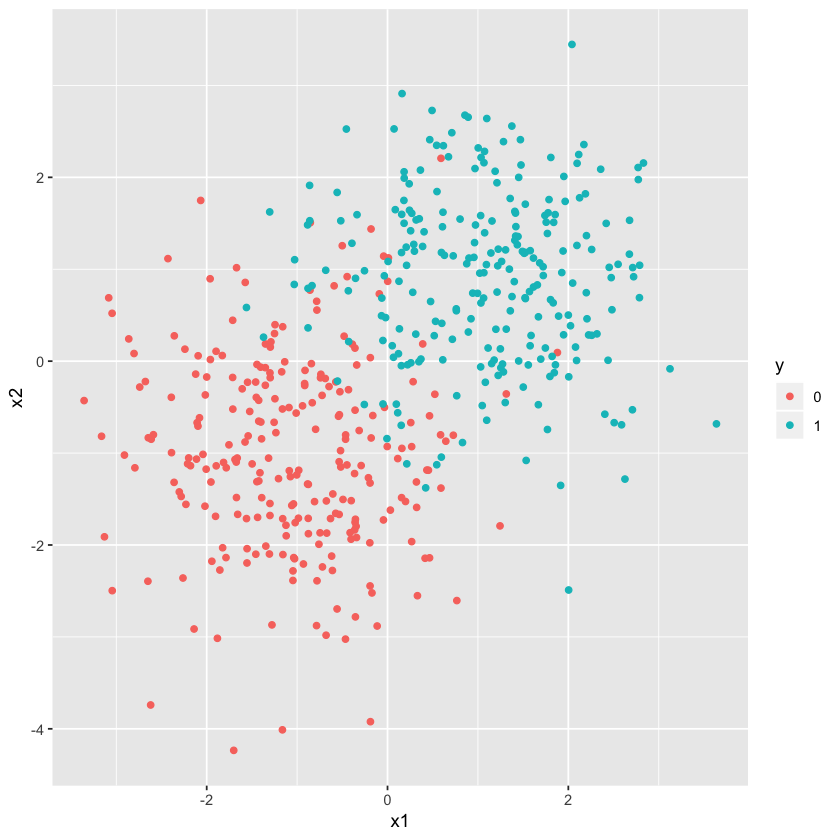

In [56]:
library(ggplot2)
data$y=as.factor(data$y)
qplot(x=x1, y=x2, data=data, color=y)

In [57]:
glm.fit = glm(y~x1+x2,family = "binomial",data=data)

In [58]:
summary(glm.fit)


Call:
glm(formula = y ~ x1 + x2, family = "binomial", data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3005  -0.1756   0.0016   0.1616   2.2876  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.1280     0.1953   0.656    0.512    
x1            2.2873     0.2650   8.633  < 2e-16 ***
x2            1.7950     0.2251   7.974 1.53e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 693.15  on 499  degrees of freedom
Residual deviance: 178.70  on 497  degrees of freedom
AIC: 184.7

Number of Fisher Scoring iterations: 7


In [59]:
my.fit<- mylogistic(y=as.numeric(data$y)-1,x=as.matrix(data[,2:3]))
my.fit$w
my.fit$Iter

,0.1280345
x1,2.2873890
x2,1.7950496


[1] 133

In [114]:
# A failed case
# Generate data
n = 500
p = 2
y = c(rep(0,n/2),rep(1,n/2))
x_class1 = matrix(rnorm(n/2*p),n/2,p)-3
x_class2 = matrix(rnorm(n/2*p),n/2,p)+3
x = rbind(x_class1,x_class2)
data = as.data.frame(cbind(y,x))
names(data) = c("y",paste("x",1:p,sep=""))

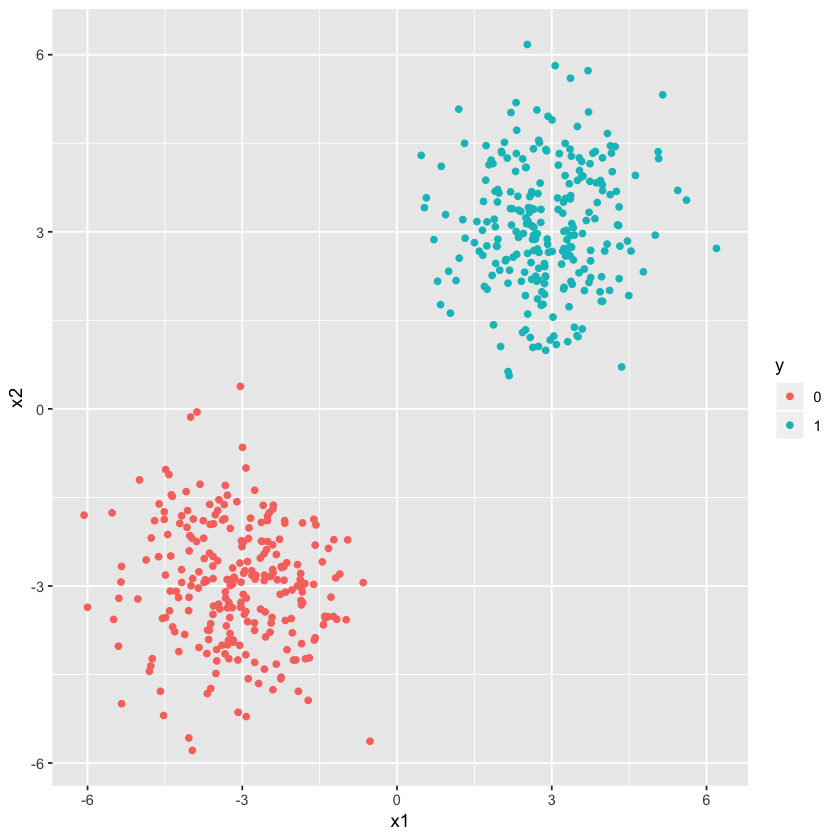

In [115]:
library(ggplot2)
data$y=as.factor(data$y)
p<- ggplot(data=data, aes(x=x1, y=x2,color=y))+ geom_point()
p

In [116]:
glm.fit = glm(y~x1+x2,family = "binomial",data=data)

Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [117]:
summary(glm.fit)


Call:
glm(formula = y ~ x1 + x2, family = "binomial", data = data)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.545e-05  -2.100e-08   0.000e+00   2.100e-08   5.257e-05  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)    1.807   9511.432   0.000    1.000
x1             8.240   6201.201   0.001    0.999
x2             6.586   5839.269   0.001    0.999

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6.9315e+02  on 499  degrees of freedom
Residual deviance: 9.6715e-09  on 497  degrees of freedom
AIC: 6

Number of Fisher Scoring iterations: 25


In [118]:
my.fit<- mylogistic(y=as.numeric(data$y)-1,x=as.matrix(data[,2:3]))
my.fit$w
my.fit$Iter

,0.2229941
x1,1.5738885
x2,1.4251539


[1] 500

In [119]:
library(MASS)
lda.fit<- lda(y~x1+x2,data=data)
lda.fit

Call:
lda(y ~ x1 + x2, data = data)

Prior probabilities of groups:
  0   1 
0.5 0.5 

Group means:
         x1        x2
0 -3.115823 -2.982626
1  2.884732  3.089785

Coefficients of linear discriminants:
         LD1
x1 0.7123687
x2 0.6826333